for momad, we simply compute: 

    - max,
    - median of medians.

Then compute: 

    - median of medians absolute deviation (that is another median of medians but subtracting the previous median from all samples)

Then we do 

    - (max - median of medians) /  (mad * x), 
    
where x is something like 1.48

# Recursive median of medians

In [17]:
def compute_mom(L):
    if len(L) < 10:
        L.sort()
        return L[int(len(L)/2)]
    S = []
    lIndex = 0
    
    for lIndex in range(0,len(L)-1,5):
        S.append(L[lIndex:lIndex+5])
    
    S.append(L[lIndex:])
    Meds = []
    
    for subList in S:
        Meds.append(compute_mom(subList))
    
    L2 = compute_mom(Meds)
    L1 = L3 = []
    
    for i in L:
        if i < L2:
            L1.append(i)
        if i > L2:
            L3.append(i)
    
    if len(L) < len(L1):
        return compute_mom(L1)
    
    elif len(L) > len(L1) + 1:
        return compute_mom(L3)
    
    else:
        return L2

# Generate SNR data

In [24]:
import numpy as np

def init_dict_list(dictionary, key):
    try: 
        dictionary[key]
    except KeyError:
        dictionary[key] = []
    return dictionary

def noise_transients_experiment(print_log=False):
    seriess = {}
    lens = {}
    maxima = {}
    moms = {}
    mads = {}
    snrs = {}
   
    n_loops = 1000
    n_samples = 2500
    counter_start = 250
    counter_end = 0
    counter_step = -25

    if print_log:
        print ("downsampling", "len", "maximum", "mom", "mad")
    for i in range(n_loops):
        array = np.random.normal(0,1,n_samples)

        for downsampling in range(counter_start, counter_end, counter_step):
            series = array[::len(array)//(len(array)//downsampling)]
            
#             print (downsampling, len(series))
            # MAX
            maximum = np.nanmax(series)

            # MOMz
            mom = compute_mom(series)

            # MAD
            series_mad = series - mom
            mad = np.median(series_mad)    

            init_dict_list(lens,i)[i].append(len(series))

            if print_log:
                print (downsampling, lens, maximum, mom, mad)
            
            snr = (maximum-mom)/(mad*1.48)
            if snr >= 10:
                init_dict_list(maxima,i)[i].append(maximum)
                init_dict_list(moms,i)[i].append(mom)
                init_dict_list(mads,i)[i].append(mad)
                init_dict_list(snrs,i)[i].append(snr)

    return {"n_loops": n_loops, 
            "n_samples": n_samples, 
            "counter_start": counter_start,
            "counter_end": counter_end, 
            "counter_step": counter_step}, seriess, lens, maxima, moms, mads, snrs

In [25]:
loop_variables, seriess, lens, maxima, moms, mads, snrs = noise_transients_experiment(False)

250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars


 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 

125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
2

125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
2

150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
2

150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
2

175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
2

175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
2

200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
25 100
250 10
225 12
200 13
175 15
150 17
125 20
100 25
75 34
50 50
2

## Print some info

In [ ]:
print ("Triggers:")
print ("=========")
for i in range(loop_variables["n_loops"]):
    print ("Array of", lens[i])
#     print ("series:\t", seriess[j])
    print ("maximum\t\t", maxima[i])
    print ("mom\t\t", moms[i])
    print ("momad\t\t", mads[i])
    print ("max_snr\t", snrs[i])
    print ()

# Make figure

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rc
rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

In [13]:
def make_figure(n_loops, snrs, lens, figure_name='trigger_fraction_vs_N', extension='.pdf'):
    fig, ax = plt.subplots()

    #for j in range(len(downsample_factors)):
    for i in range(loop_variables["n_loops"]):
        print (lens[i])
        ax.scatter(lens[i], len(snrs[i])/loop_variables["n_loops"], color='black')#, label= str(lens[i]) + " samples")
        ax.set_xlabel("N")
        ax.set_ylabel("Trigger fraction")
#         ax.legend()

    plt.savefig(figure_name + extension)

500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500


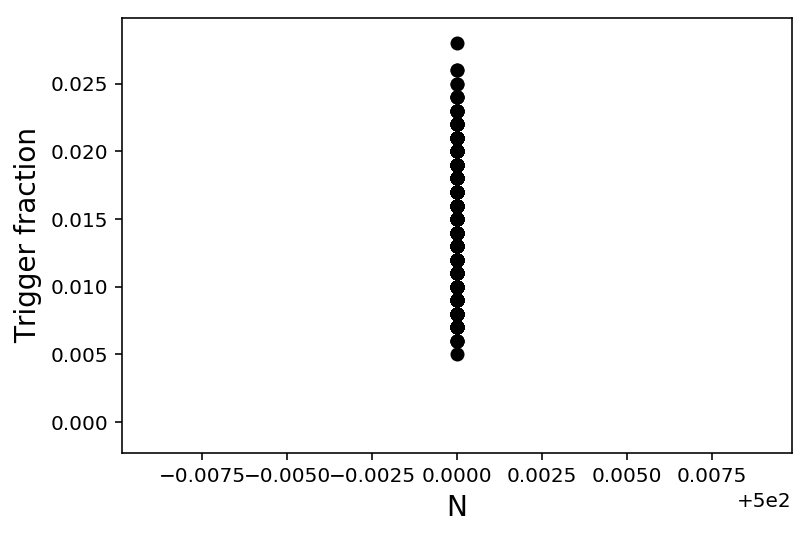

In [14]:
make_figure(n_loops, snrs, lens)